In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.decomposition import PCA

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot, string
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [4]:
context = setup.init(max_bars=4)

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [5]:
mido.Message(type='note_on').type

'note_on'

In [6]:
path = 'datasets/drum_midi//Midi.Styles.Percussion/XLN/Loud Song 001 (124 BPM)'
io.ignore_path(path)

 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS


True

In [7]:
path.split('/')

['datasets',
 'drum_midi',
 '',
 'Midi.Styles.Percussion',
 'XLN',
 'Loud Song 001 (124 BPM)']

In [8]:
'Midi.Styles.Percussion' in path.split('/')

True

In [9]:
n = 500 * 2
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE # GLOBAL
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
 [INFO] : 
 |  path ignored: name `Cha cha` in IGNORE_DIRS
path ignored: ../datasets/drum_midi//Cha cha 

path ../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BP

path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/10 Rough Rider 183BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/10 Rough Rider 183BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/10 Rough Rider 183BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/10 Rough Rider 183BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/10 Rough Rider 183BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/10 Rough Rider 183BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/10 Rough Rider 183BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/07 Trainy 100BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/07 Trainy 100BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/07 Trainy 100BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/07 Trainy 100BPM
path ../datasets/drum_midi//50´s Drummer MIDI Files/04 Country/07 Trainy 100BPM
path 

 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS
path ignored: ../datasets/drum_midi//Midi.Styles.Percussion/XLN/Loud Beat 007 Tom (130 BPM) 

 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS
path ignored: ../datasets/drum_midi//Midi.Styles.Percussion/XLN/Loud Song 004 (124 BPM) 

 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS
path ignored: ../datasets/drum_midi//Midi.Styles.Percussion/XLN/Loud Beat 003 Hihat (88 BPM) 

 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS
path ignored: ../datasets/drum_midi//Midi.Styles.Percussion/XLN/Loud Beat 019 Open HH (080 BPM) 

 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS
path ignored: ../datasets/drum_midi//Midi.Styles.Percussion/XLN/Loud Song 005 (123 BPM) 

 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS
path ignored: ../datasets/drum_midi//Midi.Styles.Percussion/XLN/Loud Beat 005 Open HH (12

path ../datasets/drum_midi//70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
path ../datasets/drum_midi//70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
path ../datasets/drum_midi//70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
path ../datasets/drum_midi//70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
path ../datasets/drum_midi//70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
path ../datasets/drum_midi//70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
path ../datasets/drum_midi//70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
path ../datasets/drum_midi//70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
path ../datasets/drum_midi//70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
path ../datasets/drum_midi//70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
path ../datasets/drum_midi//70´s Drummer MIDI Files/Tight Kit/03 Disco/10 Baby 132BPM
path ../datasets/drum_midi//70´s Drummer MIDI Files/Ti

 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  P

In [10]:
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/05 8th Hat.mid"),
 (1,
  "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/03 8th Ride.mid"),
 (2,
  "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/04 8th Perc.mid"),
 (3,
  "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/06 8th Perc.mid"),
 (4,
  "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/02 8th Hat.mid"),
 (5,
  "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/07 8th Perc.mid"),
 (6,
  "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/01 8th Hat.mid"),
 (7,
  "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM/06 8th hat.mid"),
 (8,
  "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM/02 8th Ride.mid"),
 (9,
  "../datasets/dr

In [11]:
genres = [string.extract_labels_from_filename(k) for k in labels]
genres[0][-2:]

["01 Rock'n'Roll", '06 Moonglow 140BPM']

In [12]:
unique_genres = set(genre[-1] for genre in genres)
len(unique_genres)

108

In [13]:
x_train.shape

(1000, 160, 10, 1)

In [14]:
m = int(x_train.shape[0] * 0.9)
x_train.shape, m

((1000, 160, 10, 1), 900)

In [15]:
x_test = x_train[m:]
x_train = x_train[:m]

m (50, 10)


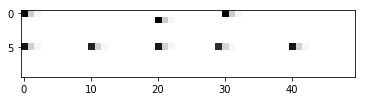

m (50, 10)


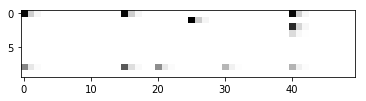

array(["../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/05 8th Hat.mid",
       '../datasets/drum_midi//50´s Drummer MIDI Files/06 Soul - Funk/10 Syncopated Ride 128BPM/03 16th Cym.mid'],
      dtype='<U120')

In [16]:
i = 0
j = 399
plot.single(x_train[i, :50,:,0])
plot.single(x_train[j, :50,:,0])
# plot.single(x_train[2, :50,:,0])
np.array(labels)[[i,j]]

In [17]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [18]:
latent_dim = 10
epsilon_std = 1.0

In [19]:
encoder_model, encoder_input, z_mean, z_log_var = models.encoder(input_shape, latent_dim)
encoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 10, 1)   0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 160, 10)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 159, 64)      1344        reshape_1[0][0]                  
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 256)          197632      conv1d_1[0][0]                   
__________________________________________________________________________________________________
z_mean (De

In [20]:
sample_ = lambda args: models.sample(args, z_mean, z_log_var, latent_dim, epsilon_std)

In [21]:
# z = Lambda(sampling)([z_mean, z_log_var])
z_input = encoder_model(encoder_input)
z_output = Lambda(sample_)(z_input)

In [22]:
decoders = models.list_decoders(input_shape)
decoded = utils.composition(decoders, z_output, verbose=False)

In [23]:
# instantiate VAE model
vae_input = encoder_input
vae_output = decoded
vae = Model(vae_input, vae_output)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 10, 1)   0                                            
__________________________________________________________________________________________________
encoder_model- (Model)          [(None, 10), (None,  204116      input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 10)           0           encoder_model-[1][0]             
                                                                 encoder_model-[1][1]             
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          2816        lambda_2[0][0]                   
__________

In [24]:
# vae.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [25]:
vae_loss = models.vae_loss(vae_input, vae_output, z_mean, z_log_var, timesteps, notes, beta=0.75, gamma=0.05)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
# vae.compile(optimizer=optimizer, loss=loss, metrics=metrics)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Output "reshape_2" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_2" during training.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
batch_size = 128
epochs = 500
params = {'batch_size': batch_size, 'return_y': False}

In [27]:
# phase_mod = 0.01
# whitening = False

In [28]:
# m = 1000
# useDataGenerator = False
# # useDataGenerator = True
# callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]

# x = x_train[:m]
# # x = x_train
# # i = [0,1, 7,8, 14,15, 399,400]
# # x = x_train[i]
# # x = np.concatenate([x for _ in range(10)])
# print('x:', x.shape)

# print('batch_size: %i' % batch_size)
# print('update-iterations:', round(epochs * x.shape[0] / batch_size))
# if useDataGenerator:
#     datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
#     history = collections.defaultdict(list)
#     n_batches = datagen.__len__()
#     for e in range(epochs):
#         print('\n[Epoch %i/%i] >>>>>>>>>' % (e, epochs))
#         for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x, x, batch_size)):
#             print(' Batch %i/%i' % (batch_i,n_batches))
#             x_ = x_batch
#             # x_ = datagen.shuffle_3rd_dim(x_)
#             # x_ = datagen.shuffle_3rd_dim_soft(x_, rate=0.5, scale=0.1, verbose=0)
#             h = vae.fit(x_, validation_data=(x_test, None), verbose=0)
#             for k,v in h.history.items(): 
#                 print(' \\_%s' % k, [round(v_,) for v_ in v])
#                 history[k].append(v)
#             if batch_i >= n_batches:
#                 break
# else:
#     h = vae.fit(x, epochs=epochs, validation_data=(x_test, None), callbacks=callbacks)
#     history = h.history

In [29]:
fn = config.model_dir + 'hi_res-v3p-4_vae.h5'
# fn = config.model_dir + 'hi_res2c_vae.h5'

In [30]:
# io.save_dict('../logs/','train_loss', history)

In [31]:
# # for suffix, model in [('vae',vae), ('encoder',encoder), ('gen',generator)]:
# #     model.save_weights(dn + prefix + suffix + '.h5', "w")
# vae.save_weights(fn, "w")

In [32]:
vae.load_weights(fn)

In [33]:
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.ylim(0,150)

m (50, 10, 1)


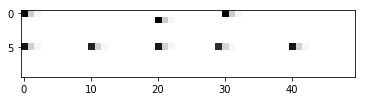

m (50, 10, 1)


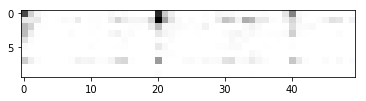

m (50, 10, 1)


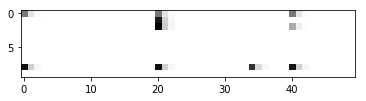

m (50, 10, 1)


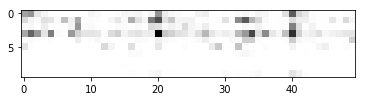

In [34]:
i,j = 0, 10
m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

In [35]:
# x = datagen.shuffle_3rd_dim_soft(x_train[:10], rate=1, intensity=2, scale=1, verbose=1)
# i = 0
# plot.single(x_train[i,:,:,0])
# plot.single(x[i,:,:,0])
# x_ = vae.predict(x)
# plot.single(x_[i,:,:,0])

In [36]:
# # min: these pixels are 'always' active
# m = x.min(axis=0)
# plot.multi(m[:30,:,0])

In [37]:
# # mean
# m = x.mean(axis=0)
# plot.single(m[:30,:,0])

## Encoder + Decoder (generator)
A model to project inputs on the latent space

In [38]:
# build a model to project inputs on the latent space
encoder = Model(encoder_input, z_mean)

In [39]:
generator_input = Input((latent_dim,))
generator_layers_ = utils.composition(decoders, generator_input)
generator = Model(generator_input, generator_layers_)

In [40]:
decoder = generator

## Style transfer

In [41]:
import sklearn.feature_selection
import sklearn.ensemble

In [42]:
pca = PCA(n_components=3)
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [43]:
m = 1000
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(900, 10)

In [44]:
import transformation_extraction

In [45]:
best_dims, importances, transformations, min_transformations = \
    transformation_extraction.between_genres(x_train_encoded, genres, v=0)


Genre A: 05 Jazz-04 Silent Tear 234BPM
 genre B: 	01 Rock'n'Roll-06 Moonglow 140BPM (len: 7)
 - i: 2, importance: 0.388226
 genre B: 	01 Rock'n'Roll-05 Straight Line 136BPM (len: 7)
 - i: 5, importance: 0.233634
 genre B: 	01 Rock'n'Roll-02 Gogo 191BPM (len: 7)
 - i: 2, importance: 0.353756
 genre B: 	01 Rock'n'Roll-07 Thwag 170BPM (len: 7)
 - i: 2, importance: 0.300926
 genre B: 	01 Rock'n'Roll-04 Maybelline 233BPM (len: 7)
 - i: 2, importance: 0.320316
 genre B: 	01 Rock'n'Roll-10 Ottis 172bpm (len: 7)
 - i: 2, importance: 0.290717
 genre B: 	01 Rock'n'Roll-03 Lips n Hips 152BPM (len: 7)
 - i: 0, importance: 0.142643
 genre B: 	01 Rock'n'Roll-01 Dancin Rick 166BPM (len: 7)
 - i: 6, importance: 0.248815
 genre B: 	01 Rock'n'Roll-08 Doowoop 140bpm (len: 7)
 - i: 2, importance: 0.305142
 genre B: 	01 Rock'n'Roll-09 Diddeley 185bpm (len: 7)
 - i: 2, importance: 0.305315
 genre B: 	05 Jazz-02 Another You 170BPM (len: 7)
 - i: 0, importance: 0.252219
 genre B: 	05 Jazz-10 Scalis 190BPM 3-

 genre B: 	05 Jazz-10 Scalis 190BPM 3-4 (len: 7)
 - i: 9, importance: 0.279252
 genre B: 	05 Jazz-09 West Coast 152BPM Brushes (len: 2)
 - i: 9, importance: 0.239500

Genre A: 05 Jazz-09 West Coast 152BPM Brushes
 genre B: 	01 Rock'n'Roll-06 Moonglow 140BPM (len: 7)
 - i: 2, importance: 0.189929
 genre B: 	01 Rock'n'Roll-05 Straight Line 136BPM (len: 7)
 - i: 2, importance: 0.171054
 genre B: 	01 Rock'n'Roll-02 Gogo 191BPM (len: 7)
 - i: 9, importance: 0.199000
 genre B: 	01 Rock'n'Roll-07 Thwag 170BPM (len: 7)
 - i: 2, importance: 0.157679
 genre B: 	01 Rock'n'Roll-04 Maybelline 233BPM (len: 7)
 - i: 2, importance: 0.215686
 genre B: 	01 Rock'n'Roll-10 Ottis 172bpm (len: 7)
 - i: 2, importance: 0.173107
 genre B: 	01 Rock'n'Roll-03 Lips n Hips 152BPM (len: 7)
 - i: 4, importance: 0.197679
 genre B: 	01 Rock'n'Roll-01 Dancin Rick 166BPM (len: 7)
 - i: 6, importance: 0.213607
 genre B: 	01 Rock'n'Roll-08 Doowoop 140bpm (len: 7)
 - i: 2, importance: 0.172214
 genre B: 	01 Rock'n'Roll-09 

 genre B: 	05 Jazz-04 Silent Tear 234BPM (len: 7)
 - i: 2, importance: 0.311983
 genre B: 	05 Jazz-10 Scalis 190BPM 3-4 (len: 7)
 - i: 2, importance: 0.263332
 genre B: 	05 Jazz-05 TNT 116BPM (len: 7)
 - i: 2, importance: 0.321408
 genre B: 	05 Jazz-09 West Coast 152BPM Brushes (len: 2)
 - i: 2, importance: 0.209086

Genre A: 01 Rock'n'Roll-09 Diddeley 185bpm
 genre B: 	01 Rock'n'Roll-06 Moonglow 140BPM (len: 7)
 - i: 9, importance: 0.135308
 genre B: 	01 Rock'n'Roll-05 Straight Line 136BPM (len: 7)
 - i: 5, importance: 0.228195
 genre B: 	01 Rock'n'Roll-02 Gogo 191BPM (len: 7)
 - i: 3, importance: 0.254553
 genre B: 	01 Rock'n'Roll-07 Thwag 170BPM (len: 7)
 - i: 7, importance: 0.215374
 genre B: 	01 Rock'n'Roll-04 Maybelline 233BPM (len: 7)
 - i: 2, importance: 0.341707
 genre B: 	01 Rock'n'Roll-10 Ottis 172bpm (len: 7)
 - i: 2, importance: 0.247933
 genre B: 	01 Rock'n'Roll-03 Lips n Hips 152BPM (len: 7)
 - i: 3, importance: 0.207414
 genre B: 	01 Rock'n'Roll-01 Dancin Rick 166BPM (l

In [56]:
print('avg importance: %f' % np.mean(importances))

avg importance: 0.258295


In [46]:
for genre_A, d in min_transformations.items():
    print('\nGenre `%s` to: \n dim:\tgenre:' % genre_A)
    for genre_B, vector in d.items():
        print(' %i \t%s' % (np.argmax(vector), genre_B))  


Genre `05 Jazz-04 Silent Tear 234BPM` to: 
 dim:	genre:
 0 	01 Rock'n'Roll-06 Moonglow 140BPM
 0 	01 Rock'n'Roll-05 Straight Line 136BPM
 0 	01 Rock'n'Roll-02 Gogo 191BPM
 0 	01 Rock'n'Roll-07 Thwag 170BPM
 0 	01 Rock'n'Roll-04 Maybelline 233BPM
 0 	01 Rock'n'Roll-10 Ottis 172bpm
 1 	01 Rock'n'Roll-03 Lips n Hips 152BPM
 0 	01 Rock'n'Roll-01 Dancin Rick 166BPM
 0 	01 Rock'n'Roll-08 Doowoop 140bpm
 0 	01 Rock'n'Roll-09 Diddeley 185bpm
 0 	05 Jazz-02 Another You 170BPM
 7 	05 Jazz-10 Scalis 190BPM 3-4
 9 	05 Jazz-05 TNT 116BPM
 2 	05 Jazz-09 West Coast 152BPM Brushes

Genre `01 Rock'n'Roll-07 Thwag 170BPM` to: 
 dim:	genre:
 0 	01 Rock'n'Roll-06 Moonglow 140BPM
 0 	01 Rock'n'Roll-05 Straight Line 136BPM
 1 	01 Rock'n'Roll-02 Gogo 191BPM
 1 	01 Rock'n'Roll-04 Maybelline 233BPM
 6 	01 Rock'n'Roll-10 Ottis 172bpm
 0 	01 Rock'n'Roll-03 Lips n Hips 152BPM
 0 	01 Rock'n'Roll-01 Dancin Rick 166BPM
 0 	01 Rock'n'Roll-08 Doowoop 140bpm
 7 	01 Rock'n'Roll-09 Diddeley 185bpm
 0 	05 Jazz-02 Another

(array([19.,  5., 94., 11.,  4., 14., 14., 14.,  7., 28.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

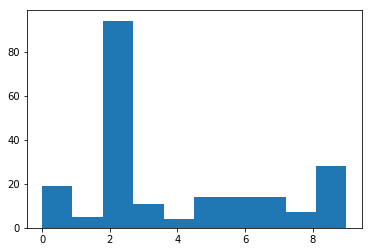

In [48]:
plt.hist(best_dims)

In [50]:
try:
    os.mkdir(config.plots_dir + 'transformations/')
except:
    pass
try:
    os.mkdir(config.plots_dir + 'min_transformations/')
except:
    pass

In [55]:
for k,v in transformations.items():
    io.save_dict(config.plots_dir + 'transformations/', k, v)
for k,v in min_transformations.items():
    io.save_dict(config.plots_dir + 'min_transformations/', k, v)    

In [46]:
os.listdir(config.plots_dir + 'transformations/')

["01 Rock'n'Roll-04 Maybelline 233BPM.csv",
 "01 Rock'n'Roll-08 Doowoop 140bpm.csv",
 '05 Jazz-05 TNT 116BPM.csv',
 "01 Rock'n'Roll-03 Lips n Hips 152BPM.csv",
 '05 Jazz-02 Another You 170BPM.csv',
 "01 Rock'n'Roll-05 Straight Line 136BPM.csv",
 '05 Jazz-10 Scalis 190BPM 3-4.csv',
 "01 Rock'n'Roll-02 Gogo 191BPM.csv",
 "01 Rock'n'Roll-09 Diddeley 185bpm.csv",
 '05 Jazz-04 Silent Tear 234BPM.csv',
 "01 Rock'n'Roll-07 Thwag 170BPM.csv",
 '05 Jazz-09 West Coast 152BPM Brushes.csv',
 "01 Rock'n'Roll-10 Ottis 172bpm.csv",
 "01 Rock'n'Roll-01 Dancin Rick 166BPM.csv",
 "01 Rock'n'Roll-06 Moonglow 140BPM.csv"]

In [78]:
def read_dict(fn):
    if not fn[-4] == '.':
        fn += '.csv'
    return pandas.read_csv(fn).to_dict()

def read_dict_dir(dn='dir/'):
    result = {}
    for fn in os.listdir(dn):
        key = fn[:-4]  # rm extension .csv
        result[key] = read_dict(dn + fn)
    return result

In [83]:
transformations = read_dict_dir(config.plots_dir + 'transformations/')
min_transformations = read_dict_dir(config.plots_dir + 'min_transformations/') 

In [84]:
list(transformations.keys())[:3]

["01 Rock'n'Roll-04 Maybelline 233BPM",
 "01 Rock'n'Roll-08 Doowoop 140bpm",
 '05 Jazz-05 TNT 116BPM']

In [ ]:
def NCD():2
    
    
    

In [ ]:
m = 100
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

In [ ]:
i = 100
amt = 0.3
print('original')
plot.single(x_train[i])
z = encoder.predict(x_train[i:i+1])
zs = [ z[0].copy() for _ in range(latent_dim) ]
for i,z_ in enumerate(zs):
    z_[i] = z_[i] + amt
generated = decoder.predict(np.concatenate([z[:1], zs]))
print(generated.shape, z[0,:5])
print('identity')
plot.single(generated[0]) 
print('mutations')
plot.single(generated[1])
plot.single(generated[2])
plot.single(generated[3])
plot.single(generated[4])

In [ ]:
mido.MidiFile()

In [ ]:
# utils.clear_dir(config.export_dir)
for i, sample in enumerate(generated):
    s = midi.MultiTrack.from_array(sample)
    mid = midi.decode.track(context, s, transpose=0)
    io.export_midifile(mid, config.export_dir + 'generated-' + str(i))

In [ ]:
# y_test = range(x_train_encoded.shape[0])
y_test = np.concatenate([list(range(n)) for _ in range(int(m/n)+1)])[:m] / n
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], alpha=0.5, s=30) # c=y_test, 

In [ ]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], alpha=0.5, s=30) # , c=y_test
# plt.colorbar()

In [ ]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_decoded = utils.composition(decoders, decoder_input, verbose=False)
generator = Model(decoder_input, _decoded)

In [ ]:
# x_decoded[0].reshape(150,3)

In [ ]:
x_train.shape

In [ ]:
min_y = 0.01
max_y = 0.5
plot.latent(generator, batch_size, latent_dim,
       x_encoded=0.5,
       n=8,
       m=3,
       crop_size=30,
       margin_top=1,
       margin_left=1,
       min_x=0.05,
       max_x=0.95,
       min_y=min_y,
       max_y=max_y)

In [ ]:
min_y2 = max_y
plot.latent(generator, batch_size, latent_dim,
       x_encoded=0.5,            
       n=6,
       m=2,
       crop_size=30,
       margin_top=1,
       margin_left=1,
       min_x=0.05,
       max_x=0.95,
       min_y=min_y2,
       max_y=0.95)

In [ ]:
a = [0,11,100,399]
# utils.clear_dir(config.export_dir)
for i in a:
    s = midi.MultiTrack.from_array(x_train[i])
    mid = midi.decode.track(context, s, transpose=0)
    io.export_midifile(mid, config.export_dir + 'y_true_' + str(i))
    
    s = midi.MultiTrack.from_array(y[i])
    mid = midi.decode.track(context, s, transpose=0)
    io.export_midifile(mid, config.export_dir + 'y_pred' + str(i))    

# Style transfer
rock ~ funk

In [ ]:
[(a,b) for a,b in enumerate(labels)]

In [ ]:
i,j,k = 21, 140, 105 # 210, 79
m = 80
sample_size = 10
print(labels[i], labels[j], labels[k])
plot.single(x_train[i,:m])
plot.single(x_train[j,:m])
plot.single(x_train[k,:m])

In [ ]:
latent_vectors = encoder.predict(x_train[:250])
indices = np.arange(latent_vectors.shape[-1]) + 1
for l in range(sample_size):
    plt.plot(indices, latent_vectors[l + i])
# plt.ylim((-1,1))

In [ ]:
for l in range(sample_size):
    plt.plot(indices, latent_vectors[l + j])
# plt.ylim((-1,1))

In [ ]:
indices = np.arange(latent_vectors.shape[-1]) + 1
for l in range(100):
    plt.plot(indices, latent_vectors[l + i])
# plt.ylim((-1,1))

In [ ]:
a = x_train[i:i+sample_size]
b = x_train[j:j+sample_size]
c = x_train[k:k+sample_size]

In [ ]:
t = models.extract_transformation(encoder, a, b)
t

In [ ]:
c_ = models.transfer_style(encoder, generator, a, b, c)
plot.single(c[0,:m])
plot.single(c_[0,:m])

In [ ]:
d = {'original':c, 'generated':c_, 'a':a, 'b':b}
for name,v in d.items():
    mid = midi.decode.track(context, v[0], name=name)
    mid.tracks[0].name = name
    io.export_midifile(mid, config.export_dir + 'style_transfer-' + name)

In [ ]:
from sklearn.decomposition import PCA
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(latent_vectors)
pca_result.shape

In [ ]:
[round(v,3) for v in pca.explained_variance_ratio_], round(sum(pca.explained_variance_ratio_[:2]),2)

In [ ]:
pca.components_

In [ ]:
pca.singular_values_

In [ ]:
print('2 best dims')
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.3, s=10) # c=labels
# plt.ylim((-1,1))

In [ ]:
print('2 best dims, 3 classes')
for i_ in [i,j,k]:
    plt.scatter(pca_result[i_:i_+sample_size,0], pca_result[i_:i_+sample_size,1], alpha=0.6, s=10) # c=labels
# plt.ylim((-1,1))

In [ ]:
# import ggplot
# chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
#         + geom_point(size=75,alpha=0.8) \
#         + ggtitle("First and Second Principal Components colored by digit")
# chart

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=500)

In [ ]:
# TODO shuffle data?
tsne_results = tsne.fit_transform(latent_vectors)
tsne_results.shape

In [ ]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=0.5, s=10)

In [ ]:
for i_ in [i,j,k]:
    plt.scatter(tsne_results[i_:i_+sample_size,0], tsne_results[i_:i_+sample_size,1], alpha=0.6, s=10) # c=labels
# plt.ylim((-1,1))

In [ ]:
# http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
    
# Authors: Robert McGibbon, Joel Nothman, Guillaume Lemaitre

from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LinearSVC())
])

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

In [ ]:
# grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
# digits = load_digits()
# grid.fit(digits.data, digits.target)

In [ ]:
mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')
